In [ ]:
import pandas as pd

# Load the dataset to check its structure and contents
file_path = '/content/bank-additional-full.csv'
bank_data = pd.read_csv(file_path, delimiter=';')

# Displaying the first few rows of the dataset to understand its structure
bank_data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Checking for data types, missing values, and overall structure
data_info = bank_data.info()
missing_values = bank_data.isnull().sum()

# Displaying a summary of categorical and numerical columns
categorical_columns = bank_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = bank_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_columns, numerical_columns, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y'],
 ['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed'],
 age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y                 0
 dtype: int64)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target variable 'y' (yes/no -> 1/0)
label_encoder = LabelEncoder()
bank_data['y'] = label_encoder.fit_transform(bank_data['y'])

# One-hot encode other categorical features
bank_data_encoded = pd.get_dummies(bank_data, columns=categorical_columns[:-1], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
bank_data_encoded[numerical_columns] = scaler.fit_transform(bank_data_encoded[numerical_columns])

# Check the transformed data structure
bank_data_encoded.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,True,False,False,False,True,False,False,False,True,False
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,True,False,False,False,True,False,False,False,True,False
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,True,False,False,False,True,False,False,False,True,False
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,True,False,False,False,True,False,False,False,True,False
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,True,False,False,False,True,False,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = bank_data_encoded.drop('y', axis=1)
y = bank_data_encoded['y']

# Split into training (70%) and testing (30%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the size of splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((28831, 53), (12357, 53), (28831,), (12357,))

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate Performance: Classification Report and Confusion Matrix
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC-AUC and plot ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Display Results
classification_rep, conf_matrix, roc_auc


('              precision    recall  f1-score   support\n\n           0       0.93      0.97      0.95     10965\n           1       0.67      0.42      0.52      1392\n\n    accuracy                           0.91     12357\n   macro avg       0.80      0.70      0.74     12357\nweighted avg       0.90      0.91      0.90     12357\n',
 array([[10679,   286],
        [  802,   590]]),
 0.9383934514730778)

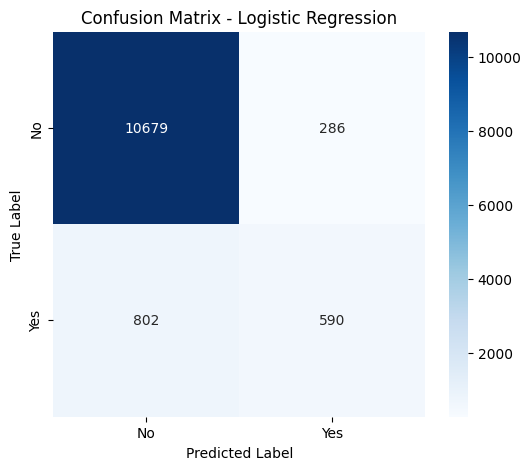

In [ ]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


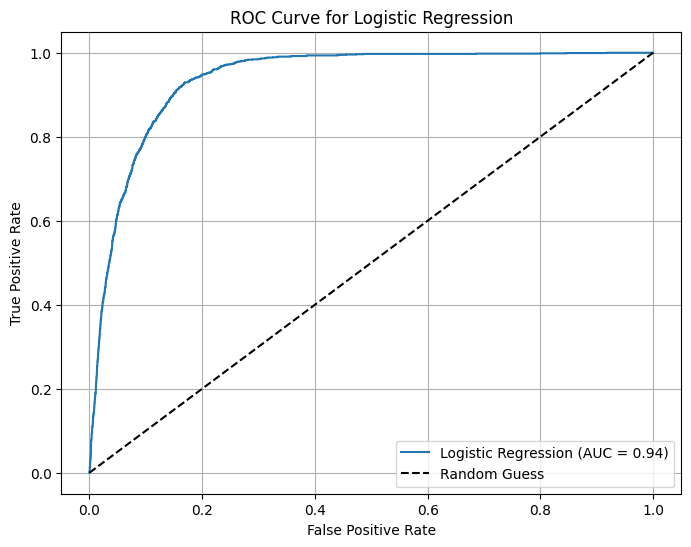

In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()


#**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, y_train)

# Predictions
y_pred_nb = naive_bayes_model.predict(X_test)
y_pred_prob_nb = naive_bayes_model.predict_proba(X_test)[:, 1]

# Evaluate Performance: Classification Report and Confusion Matrix
classification_rep_nb = classification_report(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Calculate ROC-AUC and plot ROC Curve
roc_auc_nb = roc_auc_score(y_test, y_pred_prob_nb)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)

# Display Results
classification_rep_nb, conf_matrix_nb, roc_auc_nb


('              precision    recall  f1-score   support\n\n           0       0.95      0.87      0.91     10965\n           1       0.38      0.62      0.47      1392\n\n    accuracy                           0.84     12357\n   macro avg       0.66      0.74      0.69     12357\nweighted avg       0.88      0.84      0.86     12357\n',
 array([[9546, 1419],
        [ 531,  861]]),
 0.8455066997395054)

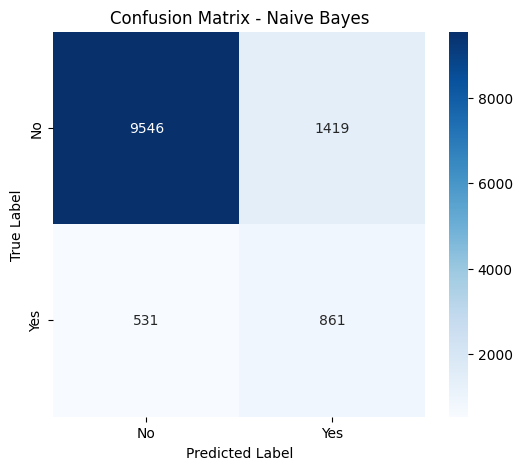

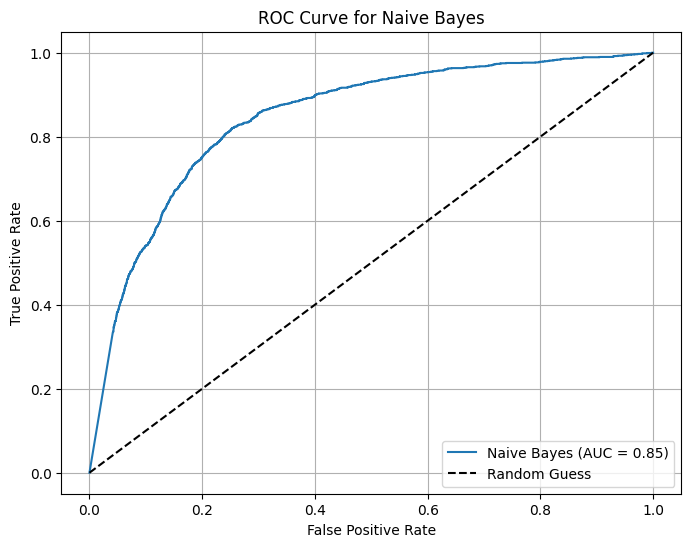

In [ ]:
# Plotting the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive Bayes")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
# One-hot encode all categorical columns properly (rechecking all missed columns)
categorical_columns = bank_data.select_dtypes(include=['object']).columns.tolist()
bank_data_encoded = pd.get_dummies(bank_data, columns=categorical_columns, drop_first=True)

# Redefine features (X) and target (y) after encoding
X = bank_data_encoded.drop('y', axis=1)
y = bank_data_encoded['y']

# Re-check for any non-numeric columns
non_numeric_columns_final_check = X.select_dtypes(include=['object']).columns.tolist()

# Ensure all features are numeric
X.dtypes.unique(), non_numeric_columns_final_check


(array([dtype('int64'), dtype('float64'), dtype('bool')], dtype=object), [])

# **K Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier




# Re-split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Re-train the KNN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluate Performance
classification_rep_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

classification_rep_knn, conf_matrix_knn, roc_auc_knn


('              precision    recall  f1-score   support\n\n           0       0.93      0.96      0.95     10965\n           1       0.59      0.47      0.52      1392\n\n    accuracy                           0.90     12357\n   macro avg       0.76      0.71      0.73     12357\nweighted avg       0.90      0.90      0.90     12357\n',
 array([[10510,   455],
        [  742,   650]]),
 0.8740082734510537)

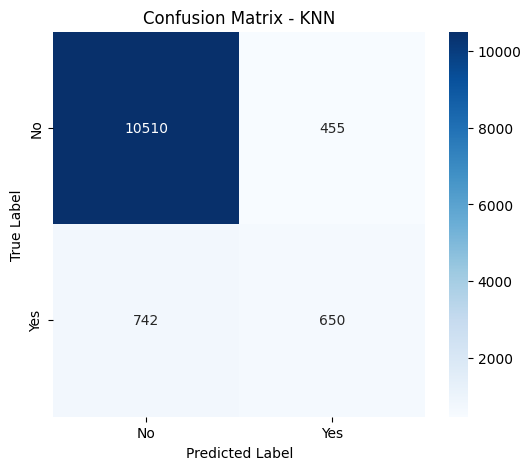

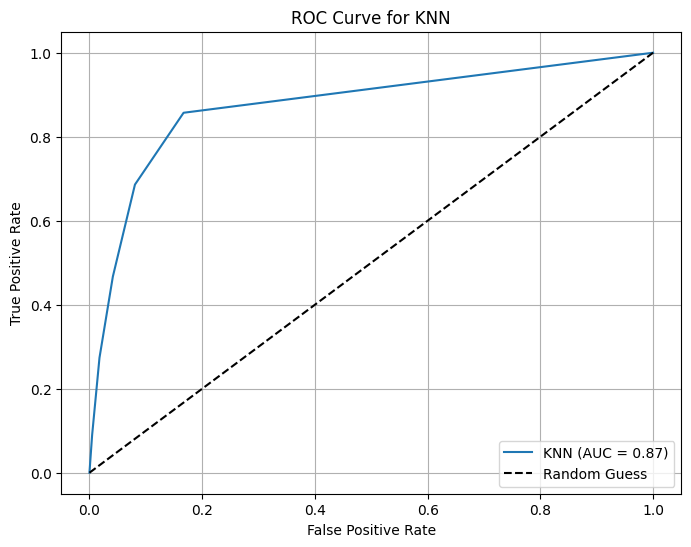

In [ ]:
# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.show()

# Plot the ROC Curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42, criterion="gini")

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predictions
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_prob_dt = decision_tree_model.predict_proba(X_test)[:, 1]

# Evaluate Performance: Classification Report and Confusion Matrix
classification_rep_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate ROC-AUC and plot ROC Curve
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)

# Display Results
classification_rep_dt, conf_matrix_dt, roc_auc_dt


('              precision    recall  f1-score   support\n\n           0       0.94      0.94      0.94     10965\n           1       0.51      0.53      0.52      1392\n\n    accuracy                           0.89     12357\n   macro avg       0.73      0.73      0.73     12357\nweighted avg       0.89      0.89      0.89     12357\n',
 array([[10261,   704],
        [  657,   735]]),
 0.7319064775068007)

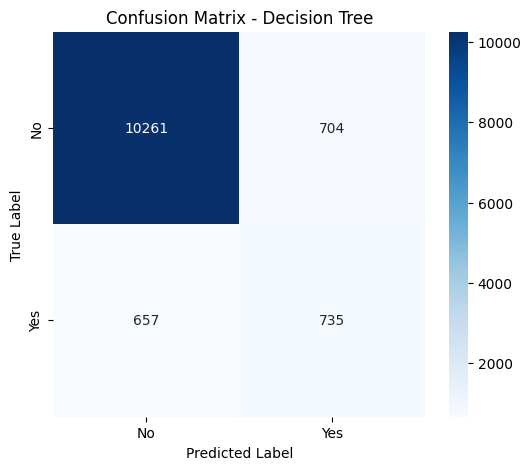

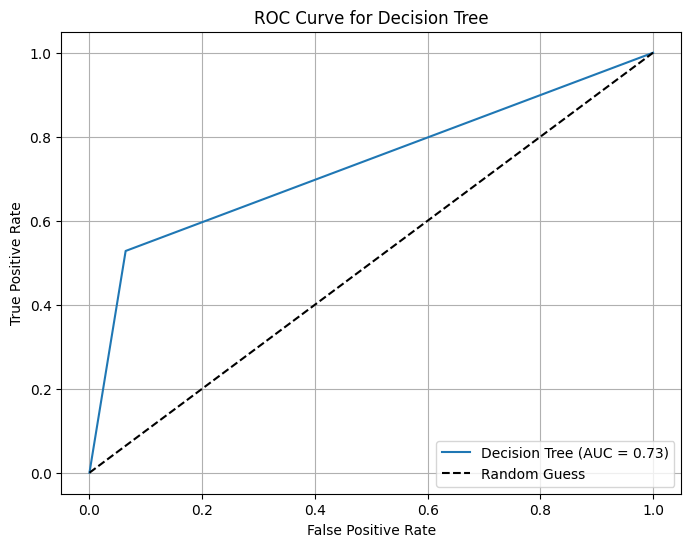

In [ ]:
# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Plot the ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.legend(loc="lower right")
plt.grid()
plt.show()


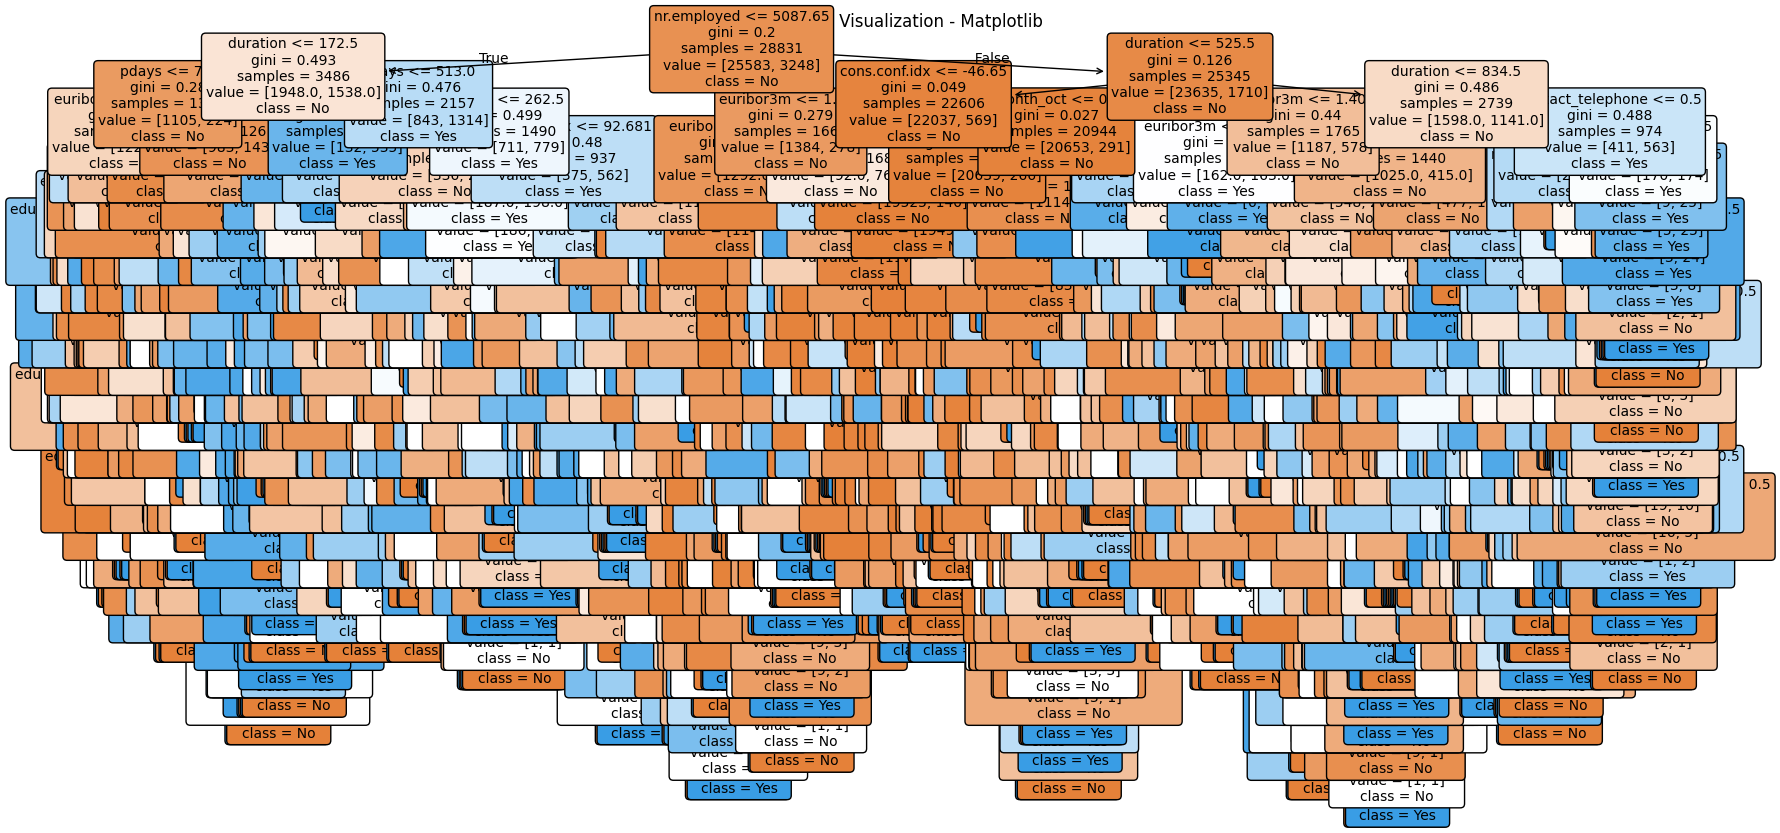

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree_model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization - Matplotlib")
plt.show()


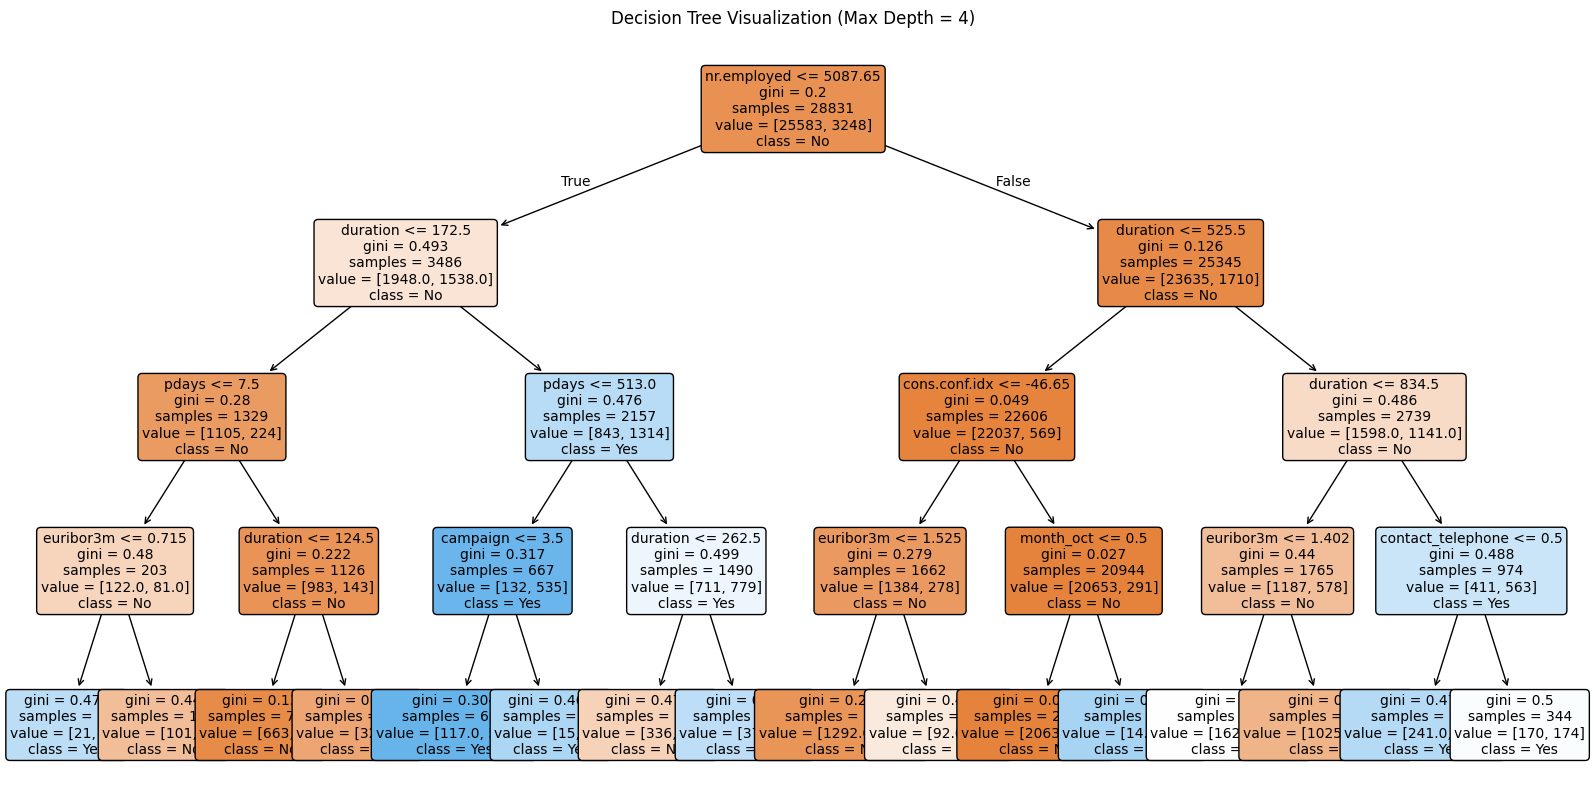

|--- nr.employed <= 5087.65
|   |--- duration <= 172.50
|   |   |--- pdays <= 7.50
|   |   |   |--- euribor3m <= 0.72
|   |   |   |   |--- class: 1
|   |   |   |--- euribor3m >  0.72
|   |   |   |   |--- class: 0
|   |   |--- pdays >  7.50
|   |   |   |--- duration <= 124.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  124.50
|   |   |   |   |--- class: 0
|   |--- duration >  172.50
|   |   |--- pdays <= 513.00
|   |   |   |--- campaign <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- campaign >  3.50
|   |   |   |   |--- class: 1
|   |   |--- pdays >  513.00
|   |   |   |--- duration <= 262.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  262.50
|   |   |   |   |--- class: 1
|--- nr.employed >  5087.65
|   |--- duration <= 525.50
|   |   |--- cons.conf.idx <= -46.65
|   |   |   |--- euribor3m <= 1.53
|   |   |   |   |--- class: 0
|   |   |   |--- euribor3m >  1.53
|   |   |   |   |--- class: 0
|   |   |--- cons.conf.idx >  -46.65
|   |   |   |--- month

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Initialize the Decision Tree model with a maximum depth of 4
decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=4, criterion="gini")

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust figure size for better readability
plot_tree(
    decision_tree_model,
    feature_names=X_train.columns.tolist(),  # Ensure feature names are passed as a list
    class_names=["No", "Yes"],               # Class labels
    filled=True,                             # Color nodes by class
    rounded=True,                            # Rounded edges for better aesthetics
    fontsize=10                              # Font size for labels
)
plt.title("Decision Tree Visualization (Max Depth = 4)")
plt.show()

# Print the textual representation of the tree (optional)
tree_rules = export_text(decision_tree_model, feature_names=list(X_train.columns))
print(tree_rules)


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100, criterion="gini")

# Train the model
random_forest_model.fit(X_train, y_train)

# Predictions
y_pred_rf = random_forest_model.predict(X_test)
y_pred_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Evaluate Performance: Classification Report and Confusion Matrix
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate ROC-AUC and plot ROC Curve
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

classification_rep_rf, conf_matrix_rf, roc_auc_rf


('              precision    recall  f1-score   support\n\n           0       0.94      0.97      0.95     10965\n           1       0.67      0.49      0.57      1392\n\n    accuracy                           0.92     12357\n   macro avg       0.81      0.73      0.76     12357\nweighted avg       0.91      0.92      0.91     12357\n',
 array([[10639,   326],
        [  715,   677]]),
 0.9438497819603651)

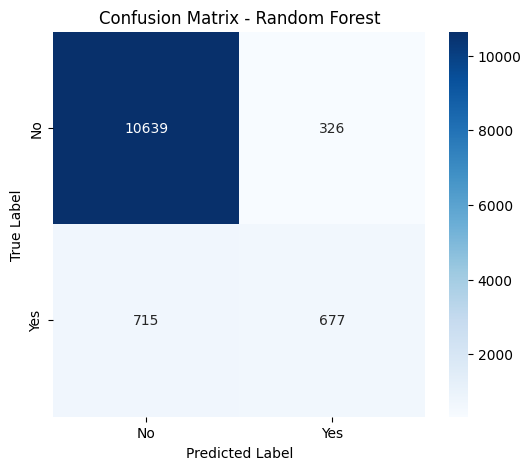

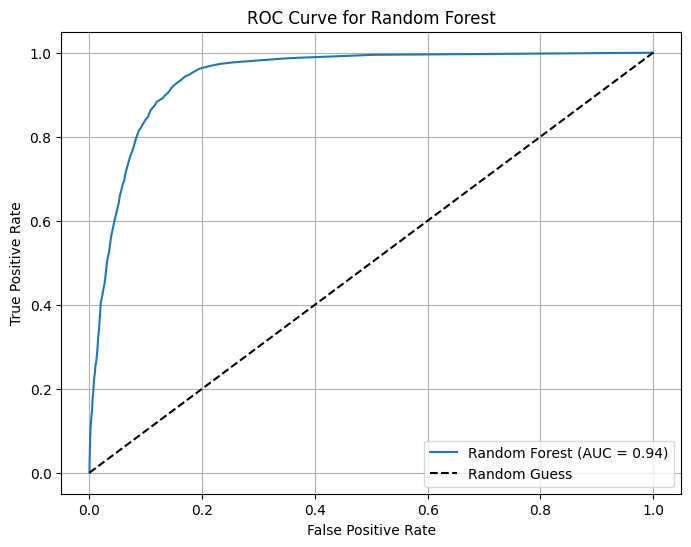

In [ ]:
# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# **XGB Classifier**

In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgboost_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgboost_model.predict(X_test)
y_pred_prob_xgb = xgboost_model.predict_proba(X_test)[:, 1]

# Evaluate Performance: Classification Report and Confusion Matrix
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculate ROC-AUC and plot ROC Curve
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)

classification_rep_xgb, conf_matrix_xgb, roc_auc_xgb


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:50:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


('              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.95     10965\n           1       0.65      0.56      0.60      1392\n\n    accuracy                           0.92     12357\n   macro avg       0.80      0.76      0.78     12357\nweighted avg       0.91      0.92      0.91     12357\n',
 array([[10550,   415],
        [  611,   781]]),
 0.9459097913423589)

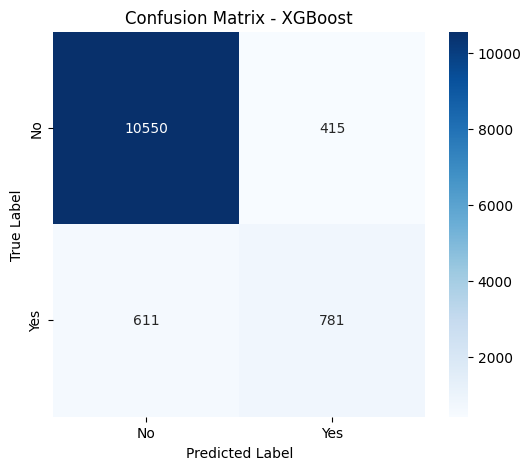

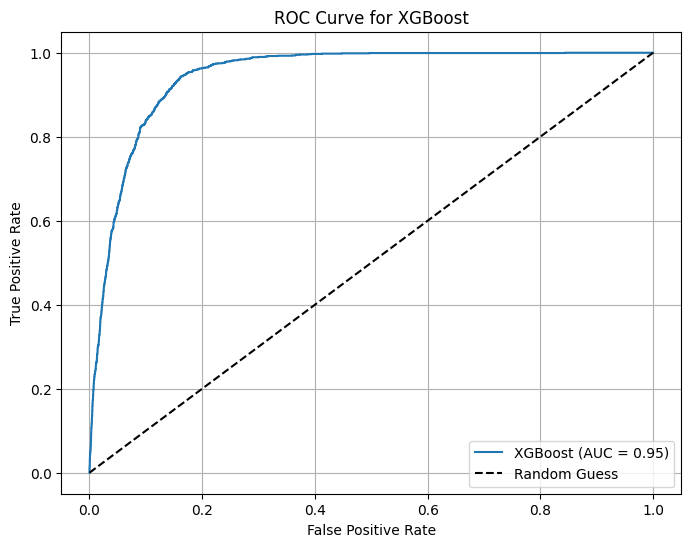

In [ ]:
# Re-importing necessary libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# **Comparative Analysis**

<ipython-input-1-3224e98f347a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric_name, data=metrics_df, palette='viridis')


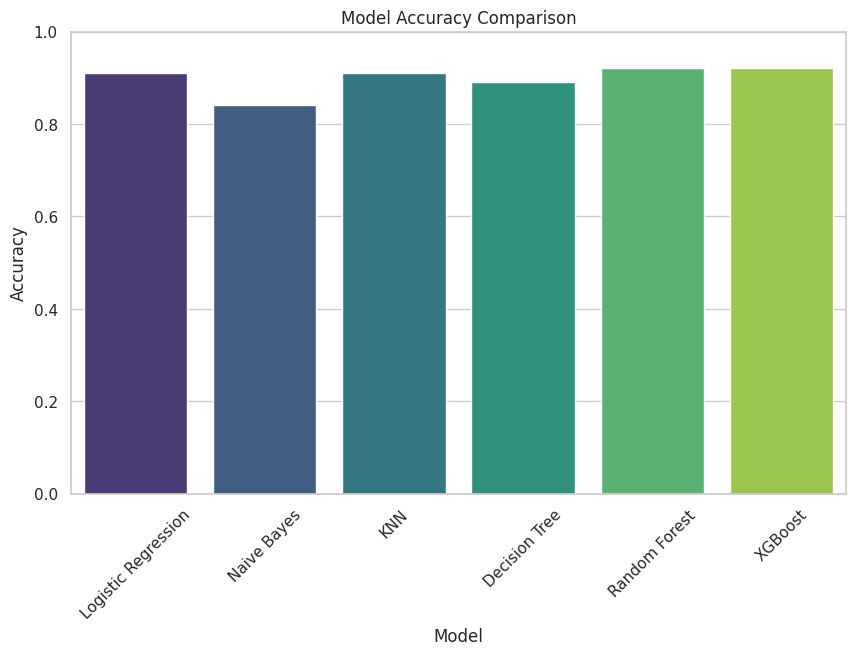

<ipython-input-1-3224e98f347a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric_name, data=metrics_df, palette='viridis')


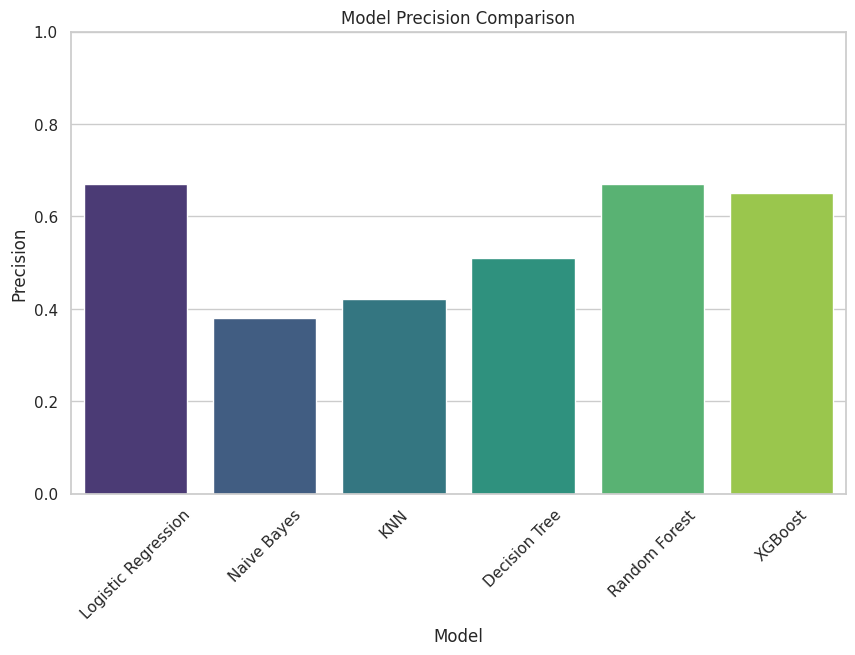

<ipython-input-1-3224e98f347a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric_name, data=metrics_df, palette='viridis')


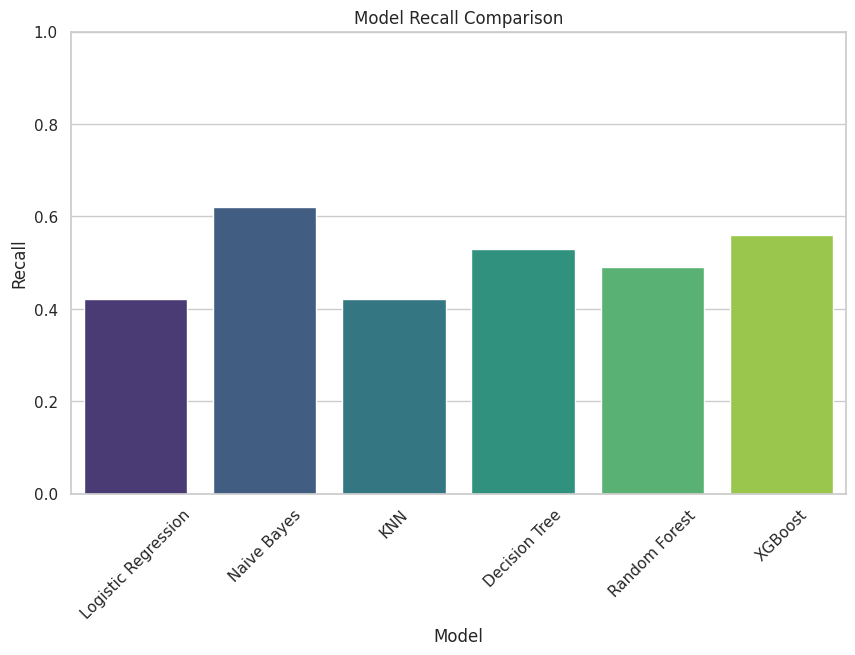

<ipython-input-1-3224e98f347a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric_name, data=metrics_df, palette='viridis')


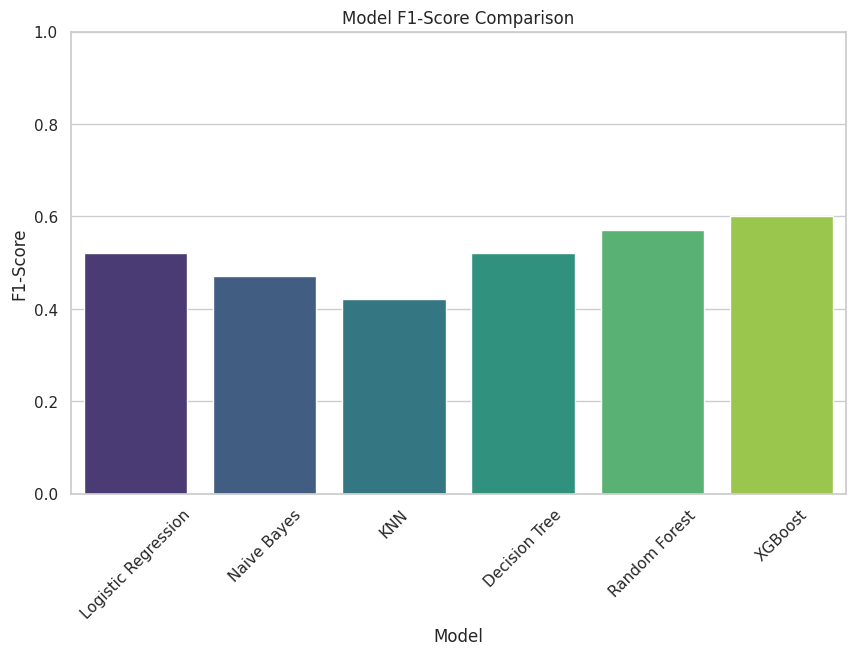

<ipython-input-1-3224e98f347a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric_name, data=metrics_df, palette='viridis')


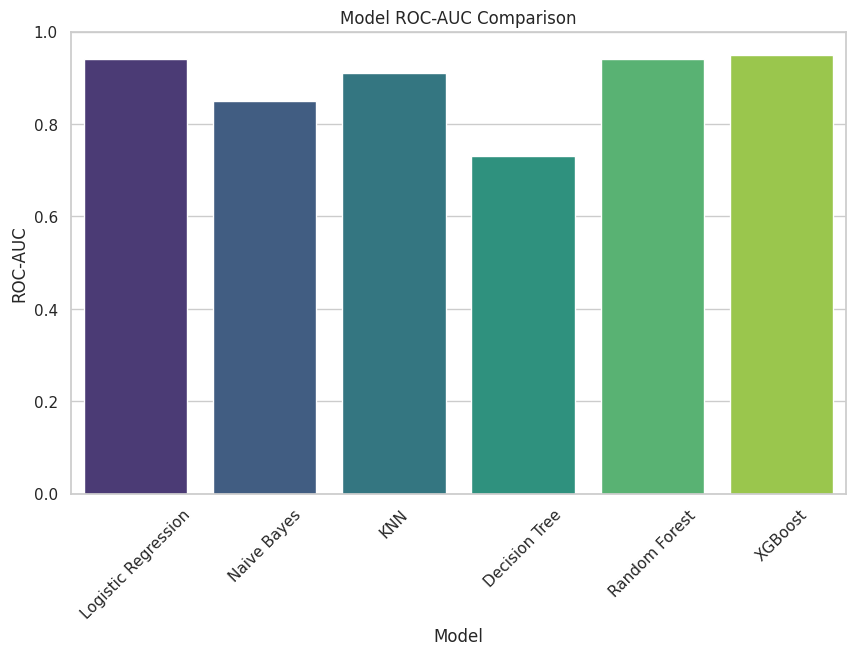

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the consolidated metrics
metrics_data = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.91, 0.84, 0.91, 0.89, 0.92, 0.92],
    'Precision': [0.67, 0.38, 0.42, 0.51, 0.67, 0.65],
    'Recall': [0.42, 0.62, 0.42, 0.53, 0.49, 0.56],
    'F1-Score': [0.52, 0.47, 0.42, 0.52, 0.57, 0.60],
    'ROC-AUC': [0.94, 0.85, 0.91, 0.73, 0.94, 0.95]
}

metrics_df = pd.DataFrame(metrics_data)

# Set the seaborn style
sns.set(style='whitegrid')

# Function to create bar plots for each metric
def plot_metric(metric_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric_name, data=metrics_df, palette='viridis')
    plt.title(f'Model {metric_name} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

# Plot Accuracy
plot_metric('Accuracy')

# Plot Precision
plot_metric('Precision')

# Plot Recall
plot_metric('Recall')

# Plot F1-Score
plot_metric('F1-Score')

# Plot ROC-AUC
plot_metric('ROC-AUC')
